In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
from cartopy import feature as cfeature
import warnings 
# this will allow us to use the code in peace :) 
warnings.filterwarnings("ignore")

## Lecture 18

### Learning objectives

- Learn about the Python packages **geoplot** and **geopandas**.
- Learn a bit about coordinate systems (UTM versus WGS84, as examples).
- Learn something about Hawaiian volcanism.

By now we have learned a great deal about plotting and map making.  In this lecture we will pull together a number of concepts and add some new tools (geoplot and geopandas).  **Geopandas** is a software package built on top of **pandas** that is made for dealing with spatial data. **Geoplot** is built on top of **matplotlib** and has a number of mapping tools that we can use.

Let's import the packages we will need for this lecture.

In [2]:
import geopandas as gpd
import geoplot as gplt

### 18.1 Volcanism in the Western US

By now you should be familiar with the rudiments of **cartopy**.  We will now learn how to make more complicated plots using the  volcanoes active over the last 6 million years as an example. We downloaded the data from this website: https://www.navdat.org/NavdatSearch/Search.cfm  by setting the Age filter to 6 (Ma) and exporting the data as an excel spreadsheet which in turn got saved as a tab delimited text file in `Datasets/navdat.txt`.

The first new thing we need to grapple with is the **geopandas** overlay on **pandas**.  This is a very powerful, but also complicated software package.  The first thing we will use it for is wrangling our volcano dataset into a form that we can plot with **geoplot**.  

A **geopandas** `DataFrame` differs from a **pandas** `DataFrame` in that it has a `geometry` field which can be points, polygons or other spatial data types.  


We'll approach this as follows: 
- We need to first read in the data set with **pandas**.
- Make a map as we did in Lecture 17.
- Turn the **pandas** `DataFrame` into a **geopandas** one by putting in the `geometry` information required by **geoplot**.
- Use **geoplot** to do some new stuff.  

In [3]:
# Read in the data file
df = pd.read_csv('Datasets/navdat.txt', sep='\t')
df.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE
0,82-97,0.0,0.006,0.002,41.4090,-122.1945,CALIFORNIA
1,97-4,0.0,0.006,0.002,41.4272,-122.1600,CALIFORNIA
2,99-12A,0.0,0.006,0.002,41.4258,-122.1635,CALIFORNIA
3,99-14,0.0,0.006,0.002,41.4153,-122.1793,CALIFORNIA
4,99-15,0.0,0.006,0.002,41.4298,-122.1695,CALIFORNIA


Make the map (cribbing from Lecture 17). 

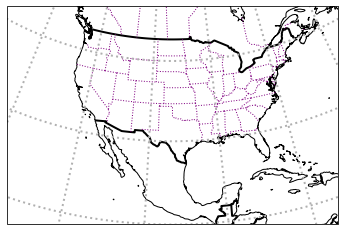

In [4]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 15.0, 52.0], crs=ccrs.PlateCarree())
gl = ax.gridlines(ylocs=np.arange(0.0,90.0,15.0), xlocs=np.arange(-180.0, 180.0, 15.0),\
                linewidth=2, linestyle="dotted")

ax.coastlines();

ax.add_feature(BORDERS, linestyle='-', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);

Now for the new stuff.  We nedd to use the `.GeoDataFrame` method of **geopandas** to put in the geometry field required by **geoplot**.   

In [5]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
gdf.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE,geometry
0,82-97,0.0,0.006,0.002,41.4090,-122.1945,CALIFORNIA,POINT (-122.19450 41.40900)
1,97-4,0.0,0.006,0.002,41.4272,-122.1600,CALIFORNIA,POINT (-122.16000 41.42720)
2,99-12A,0.0,0.006,0.002,41.4258,-122.1635,CALIFORNIA,POINT (-122.16350 41.42580)
3,99-14,0.0,0.006,0.002,41.4153,-122.1793,CALIFORNIA,POINT (-122.17930 41.41530)
4,99-15,0.0,0.006,0.002,41.4298,-122.1695,CALIFORNIA,POINT (-122.16950 41.42980)


You can see that **geopandas** put in a new column, called `geometry` with the lat/lon as a tuple with the geometry type of `POINT`.  

Now we can just plot the points with `.pointplot()` from **geoplot** to make the heatmap!
A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
We can use one of the columns to determine color (`hue`), so in this example, we color the points by age:

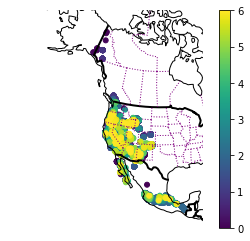

In [6]:
# Same as before:  
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 15.0, 52.0], crs=ccrs.PlateCarree())

ax.coastlines();

ax.add_feature(BORDERS, linestyle='-', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces); # The NEW stuff!

gplt.pointplot(gdf, ax=ax, hue='CALCULATED AGE', legend=True);

There are many more plots that we can make with **geoplot**.  See this website for all the options:  https://residentmario.github.io/geoplot/plot_references/plot_reference.html

In [7]:
# Read in the data file
df = pd.read_csv('Datasets/WUS_navdat.txt', sep='\t')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [8]:
df.head()

,SAMPLE ID,CALCULATED AGE,CALCULATED MAX AGE,CALCULATED MIN AGE,LATITUDE,LONGITUDE,STATE,geometry
0,PENL-3,27.00,30.00,25.00,37.9483,-110.7789,UTAH,POINT (-110.77890 37.94830)
1,PENL-5,27.00,30.00,25.00,37.9550,-110.7881,UTAH,POINT (-110.78810 37.95500)
2,PENL-6,27.00,30.00,25.00,37.9564,-110.7878,UTAH,POINT (-110.78780 37.95640)
3,U19A\S1-2240D,12.85,12.80,12.90,37.2734,-116.3703,NEVADA,POINT (-116.37030 37.27340)
4,U19BA1-1935.8S,13.16,13.15,13.17,37.2943,-116.3130,NEVADA,POINT (-116.31300 37.29430)


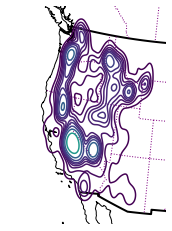

In [9]:
# same as before:  
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.add_feature(BORDERS, linestyle='-', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);

ax.coastlines()

# but with the KDE plot.  
gplt.kdeplot(gdf, ax=ax);

That made a contour plot for the locations of volcanoes in the Western US. What we were after was a heatmap in which color indicates density of volcanoes. We can do that with the `shade` argument and we can also specify a colormap with the familiar `cmap` argument.  Maybe `cmap=inferno` is appropriate?  

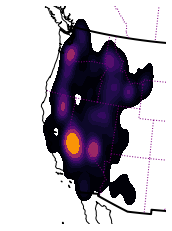

In [10]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.add_feature(BORDERS, linestyle='-', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);

ax.coastlines()

# but with the KDE plot.  
gplt.kdeplot(gdf, ax=ax, shade=True, cmap='inferno');

### 18.2 Historical lava flows in Hawaii

The big advantage of **geopandas** is the ability to plot polygons.  Polygons outline geological features such as formations, age units, etc.   Coastlines are really polygons too.  In the rest of this lecture, we will explore making maps with some geologically interesting polygons - historical lava flows in Hawaii.  

We will proceed as follows: 

1. Get the coastline of the Big Islanad of Hawaii into a `geopandas.DataFrame`.
    - These are in the file `Datasets/Coastline.shp`.
    - Make a quick plot of Hawaii as a lightgreen polygon in a sea of lightblue. 
2. Find the elevation data for the Big Island of  Hawaii.
    - Make a heatmap of the elevation data.
    - Make a contour plot of the elevation data (a topographic map).  
3. Find the lava flow outlines from https://pubs.usgs.gov/of/2007/1089/.
    - These data are in `Datasets/BigIslandData.shp` and are in Universal Transverse Mercator and we really want them in lat/lon (in fact, on the WGS84 ellipsoid). Converting between different coordinate systems just means we to know the transforms. Here is a big list of them:  http://spatialreference.org.     
    - Plot the converted polygons on the topographic map.   

Read in the coastlines for the State of Hawaii, filter for the Island Hawaii (it's the big one with the active lava flows) and plot the outline with the `.plot()` method on `geopandas.DataFrames`.

In [11]:
# Read in the data as a geopandas dataframe
hawaii = gpd.read_file('Datasets/Coastline.shp')

# Take a quick look at the format:
hawaii.head()

,objectid,water,sqmi,isle,totsqmi,createdby,agency,publishdat,featureuid,createdate,modifiedda,modifiedby,deliveryda,sourceid,severity,comments,st_areasha,st_lengths,geometry
0,1,0,554.722000,Kauai,554.7220,None,None,1899-12-30T00:00:00.000Z,{48E33DCC-4DD7-4387-8928-A02D83F9AAEB},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.436729e+09,0,"POLYGON ((-159.38705 22.22196, -159.38689 22.2..."
1,2,0,0.424376,Niihau,72.3687,None,None,1899-12-30T00:00:00.000Z,{27E5BE15-4622-4A10-A364-2AC06476F3FB},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.099133e+06,0,"POLYGON ((-160.09700 22.01466, -160.09711 22.0..."
2,3,0,71.944300,Niihau,72.3687,None,None,1899-12-30T00:00:00.000Z,{40D98504-C043-410B-B68E-32EA92678F0D},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.863355e+08,0,"POLYGON ((-160.06154 21.99651, -160.06147 21.9..."
3,4,0,597.069000,Oahu,598.9200,None,None,1899-12-30T00:00:00.000Z,{C54FC846-8A66-45DB-AB2F-1BEA3891B5CA},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.546408e+09,0,"POLYGON ((-158.00348 21.69940, -158.00282 21.6..."
4,5,0,0.712330,Oahu,598.9200,None,None,1899-12-30T00:00:00.000Z,{1C2967E7-3099-42C8-84ED-1D3481F90CDE},None,None,None,2016-09-13T00:00:00.000Z,None,None,None,1.844934e+06,0,"POLYGON ((-157.96071 21.36957, -157.96088 21.3..."


There are data from all the Hawaiian islands, so we should filter for the Big Island, which is actually named "Hawaii" too.  

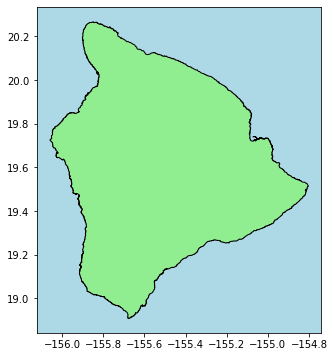

In [12]:
# Select only the data from island called "Hawaii". 
bigIsland = hawaii[(hawaii.isle == 'Hawaii')]
fig, ax = plt.subplots(figsize=(8,6)) # Make fig and ax objects
# Set the ocean to blue.
ax.set_facecolor('lightblue')
# Plot the polygons from the geometry column
bigIsland.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgreen');

Ok, that was pretty easy.  

Now let's put on the topography. The `matplotlib.tri.tricontourf()` funtion takes unstructured x,y,z data  and plots contours of an interpolated surface between them. This allows us to make

But we have to import the function first, as this is a new one.  It has a number of functions which you can explore (try `help(tri)` after importing the module).   

In [13]:
import matplotlib.tri as tri

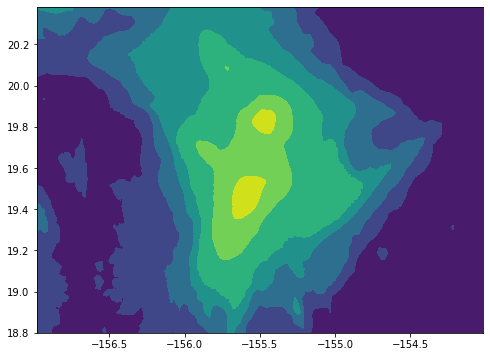

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
# read in the elevation data as a Pandas DatFrame.  
bigIslandElev = pd.read_csv('Datasets/BigIslandElev.csv')
# Plot longitude as x, latitude as y and elevation as z:
x = bigIslandElev.lon.values
y = bigIslandElev.lat.values
z = bigIslandElev.elevation.values
ax.tricontourf(x, y, z);

Well that was relatively painless.  Now let's plot the same data, but as a contour plot. We can use the `matplotlib.tri.tricontour()` function to do this.

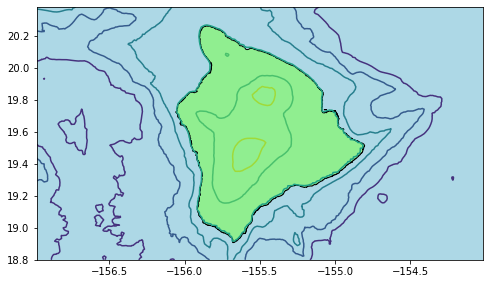

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
# Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgreen')

ax.tricontour(x, y, z);

We can specify the colors for contour lines using the argument `colors`. If we set a single value, all contours will have the same color. We can also specify the specific contour values to plot using the argument `levels`.  Let's modify the plot so the contours look nicer:

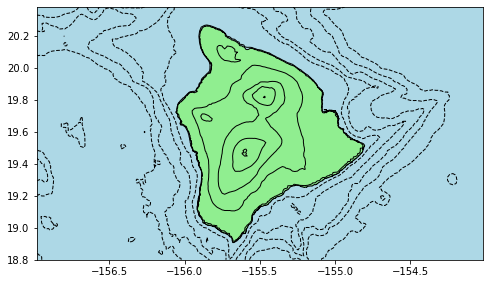

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
# Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgreen')

ax.tricontour(x, y, z, colors='black', linewidths=1, levels=np.arange(-5000,5000,1000));

Now we can read in the flow polygons and convert them from UTM to WGS84. 

But first what are 'UTM' and 'WGS84'?  

### 18.3 Coordinate systems 

There are many coordinate systems, but the two used with GPS are geodetic latitude/longitude/elevation and UTM (Universal Transverse Mercator). 

Lat/Lon/Elevation: The prime meridian and the equator are the reference planes used to define latitude and longitude.  The geodetic latitude of a point is the angle from the equatorial plane to the vertical direction of  a line normal to the reference ellipsoid.  The geodetic longitude of a point is the angle between a reference plane and a plane passing through the point, both planes being perpendicular to the equatorial plane.  The geodetic elevation is at a point is the distance from the reference ellipsoid to the point in a direction normal to the ellipsoid.  We will be using the reference ellipsoid known as WGS84 (although there are many so be careful!)  

The Universal Transverse Mercator (UTM) coordinates define map locations (2D) within zones.  Zone numbers designate 6 degree longitudinal strips. The letters go from A (south pole) to Z (north pole). So  Each zone has a central meridian (CM).  Northings/eastings are measured from the equator and the CM.   San Diego is in zone S11, for example.  

It turns out that with **geopandas**, conversion is pretty straightforward, once you know the details of what coordinate system you are in.  For this exercise, the data are from Hawaii and are in zone 4 based on the NAD83 ellipsoid in units of meters.  We want them in longitude/latitude on ellipsoid WGS84. 


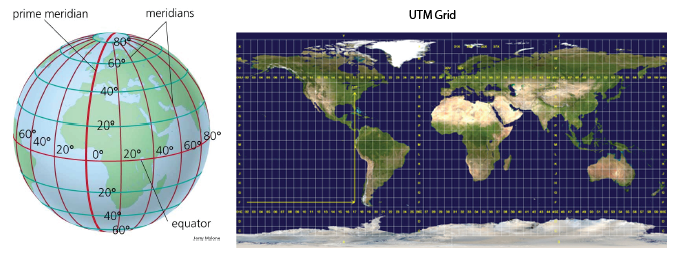

In [17]:
Image('Figures/coordinateSystems.png')

Lets set our conversion strings, read in the data and first take a look at the geometry field in UTM. 

In [18]:
# Set Conversion Strings
UTM4 = '+proj=utm +zone=4 +ellps=GRS80 +datum=NAD83 +units=m +no_defs'
WGS84 = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

# Get Big Island Flows and convert to WGS84
bigIslandFlows = gpd.read_file('Datasets/BigIslandData.shp', crs=UTM4)
# On UTM4
bigIslandFlows.head()

,ID,ISLAND,VOLCANO,STRAT_CODE,SYMBOL,AGE_GROUP,AGE_RANGE,NAME,NAME0,UNIT,ROCK_TYPE,LITHOLOGY,VOLC_STAGE,COMPOSITIO,SOURCE,Ages,geometry
0,5522,Hawaii,mloa,209,Qk5,1,A.D. 1843,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1843.0,"POLYGON ((862851.765 2185118.765, 862962.993 2..."
1,5715,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((909140.835 2184113.620, 909172.416 2..."
2,5733,Hawaii,mloa,209,Qk5,1,A.D. 1855,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1855.0,"POLYGON ((899049.875 2183325.490, 899081.226 2..."
3,5787,Hawaii,mloa,209,Qk5,1,A.D. 1935,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1935.0,"POLYGON ((868383.951 2181757.820, 868387.588 2..."
4,5986,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((879570.033 2179034.794, 879614.478 2..."


Looking at the polygon for the first flow (ID=5522), we can see how the `POLYGON` column has points like (862851.7650805543 2185118.765394682,...).  These are the Easting and Northing of a point on the flow with ID 5522.  How do I know which is easting and which is northing???   (HINT: think about the definitions).  

In [19]:
bigIslandFlows.loc[bigIslandFlows.ID == 5522]['geometry']

0    POLYGON ((862851.765 2185118.765, 862962.993 2...
Name: geometry, dtype: geometry

We can convert between coordinate systems when we read the file in like this: 

In [20]:
bigIslandFlows = gpd.read_file('Datasets/BigIslandData.shp', crs=UTM4).to_crs(WGS84)
bigIslandFlows.head()

,ID,ISLAND,VOLCANO,STRAT_CODE,SYMBOL,AGE_GROUP,AGE_RANGE,NAME,NAME0,UNIT,ROCK_TYPE,LITHOLOGY,VOLC_STAGE,COMPOSITIO,SOURCE,Ages,geometry
0,5522,Hawaii,mloa,209,Qk5,1,A.D. 1843,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1843.0,"POLYGON ((-155.53876 19.72831, -155.53770 19.7..."
1,5715,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((-155.09815 19.71019, -155.09785 19.7..."
2,5733,Hawaii,mloa,209,Qk5,1,A.D. 1855,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1855.0,"POLYGON ((-155.19439 19.70515, -155.19409 19.7..."
3,5787,Hawaii,mloa,209,Qk5,1,A.D. 1935,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1935.0,"POLYGON ((-155.48672 19.69697, -155.48669 19.6..."
4,5986,Hawaii,mloa,209,Qk5,1,A.D. 1880-1881,Kau Basalt,None,None,Lava flows,Pahoehoe and aa,shield,Tholeiitic basalt,"Wolfe and Morris, 1996a",1881.0,"POLYGON ((-155.38075 19.67029, -155.38033 19.6..."


And now notice how the polygon is in longitude/latitude:

In [21]:
bigIslandFlows.loc[bigIslandFlows.ID == 5522]['geometry']

0    POLYGON ((-155.53876 19.72831, -155.53770 19.7...
Name: geometry, dtype: geometry

And now for the plot!

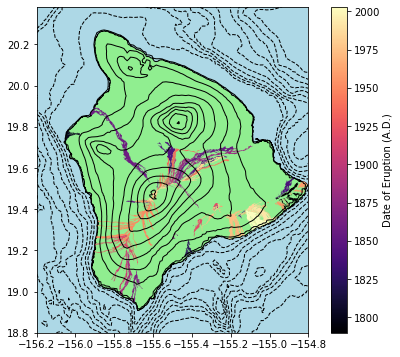

In [22]:
# From before
fig, ax = plt.subplots(figsize=(8,6))
# Setting the ocean to blue.
ax.set_facecolor('lightblue')
bigIsland.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgreen')

ax.tricontour(x, y, z, colors='black', linewidths=1, levels=np.arange(-5000,5000,500))

# Now the flow polygons: 
bigIslandFlows.plot(ax=ax, column='Ages', cmap='magma', legend=True, legend_kwds={'label': 'Date of Eruption (A.D.)'})
plt.xlim(-156.2,-154.8)
plt.savefig('hawaii.jpg');